In this file i have implimented PCA with Manual calculation as well as library

# PCA

In [18]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df.shape

(1599, 12)

In [6]:
df_feature = df.drop(columns=['quality'])
y = df['quality']

In [23]:
df_feature.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [24]:
df_feature.shape

(1599, 11)

In [25]:
df_feature.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


# Fianding component by manual calculation

In [27]:
from sklearn.preprocessing import StandardScaler
scaled_df = StandardScaler()
SND_df = pd.DataFrame(scaled_df.fit_transform(df_feature))
SND_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [28]:
SND_df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.435512e-16,1.699704e-16,4.335355e-16,-1.905223e-16,4.838739e-16,1.432042e-16,1.289532e-16,-3.482795e-14,3.002879e-15,7.639596e-16,9.437243e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00


In [29]:
sigma = np.cov(SND_df)
sigma

array([[ 0.65591653,  0.30217362,  0.31104027, ...,  0.09109434,
         0.38788871, -0.25548889],
       [ 0.30217362,  0.79044896,  0.50304326, ...,  0.13053479,
         0.29066836, -0.40320635],
       [ 0.31104027,  0.50304326,  0.36665167, ...,  0.02758615,
         0.15728926, -0.32501511],
       ...,
       [ 0.09109434,  0.13053479,  0.02758615, ...,  0.49515424,
         0.57887443,  0.21975992],
       [ 0.38788871,  0.29066836,  0.15728926, ...,  0.57887443,
         0.89559533,  0.16403365],
       [-0.25548889, -0.40320635, -0.32501511, ...,  0.21975992,
         0.16403365,  0.60650808]])

In [33]:
l ,x = np.linalg.eig(SND_df.T @ SND_df/1598)

Eigenvalues

In [34]:
l

array([3.10107182, 1.92711489, 1.55151379, 1.21399175, 0.95989238,
       0.05959558, 0.18144664, 0.34485779, 0.42322138, 0.58415655,
       0.66002104])

Eigenvectors

In [35]:
x

array([[ 0.48931422, -0.11050274, -0.12330157, -0.22961737, -0.08261366,
        -0.63969145, -0.24952314,  0.19402091, -0.17759545, -0.35022736,
         0.10147858],
       [-0.23858436,  0.27493048, -0.44996253,  0.07895978,  0.21873452,
        -0.0023886 ,  0.36592473, -0.1291103 , -0.07877531, -0.5337351 ,
         0.41144893],
       [ 0.46363166, -0.15179136,  0.23824707, -0.07941826, -0.05857268,
         0.0709103 ,  0.62167708, -0.38144967, -0.37751558,  0.10549701,
         0.06959338],
       [ 0.14610715,  0.27208024,  0.10128338, -0.37279256,  0.73214429,
        -0.18402996,  0.09287208,  0.00752295,  0.29984469,  0.29066341,
         0.04915555],
       [ 0.21224658,  0.14805156, -0.09261383,  0.66619476,  0.2465009 ,
        -0.05306532, -0.21767112,  0.11133867, -0.35700936,  0.37041337,
         0.30433857],
       [-0.03615752,  0.51356681,  0.42879287, -0.04353782, -0.15915198,
         0.05142086,  0.24848326,  0.63540522, -0.2047805 , -0.11659611,
        -0.014

Calculating PC1 with formula

In [41]:
pc1_data = SND_df @ x[:,0]
pc1_data

0      -1.619530
1      -0.799170
2      -0.748479
3       2.357673
4      -1.619530
          ...   
1594   -2.150500
1595   -2.214496
1596   -1.456129
1597   -2.270518
1598   -0.426975
Length: 1599, dtype: float64

In [39]:
pc1_data.shape

(1599,)

In [42]:
pc2_data = SND_df @ x[:,1]
pc2_data

0       0.450950
1       1.856553
2       0.882039
3      -0.269976
4       0.450950
          ...   
1594    0.814286
1595    0.893101
1596    0.311746
1597    0.979791
1598   -0.536690
Length: 1599, dtype: float64

In [43]:
pc2_data.shape

(1599,)

# PCA with Library

In [45]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)

In [48]:
pca.fit_transform(SND_df)

array([[-1.61952988,  0.45095009],
       [-0.79916993,  1.85655306],
       [-0.74847909,  0.88203886],
       ...,
       [-1.45612897,  0.31174559],
       [-2.27051793,  0.97979111],
       [-0.42697475, -0.53669021]])

In [50]:
pc1_data

(0      -1.619530
 1      -0.799170
 2      -0.748479
 3       2.357673
 4      -1.619530
           ...   
 1594   -2.150500
 1595   -2.214496
 1596   -1.456129
 1597   -2.270518
 1598   -0.426975
 Length: 1599, dtype: float64,
 0       0.450950
 1       1.856553
 2       0.882039
 3      -0.269976
 4       0.450950
           ...   
 1594    0.814286
 1595    0.893101
 1596    0.311746
 1597    0.979791
 1598   -0.536690
 Length: 1599, dtype: float64)

we can see pc1 and PCA with library has the same values

In [51]:
SND_df

,0,1,2,3,4,5,6,7,8,9,10
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [52]:
pca = PCA()

In [58]:
principle_component = pca.fit_transform(SND_df)

# Screen Plot

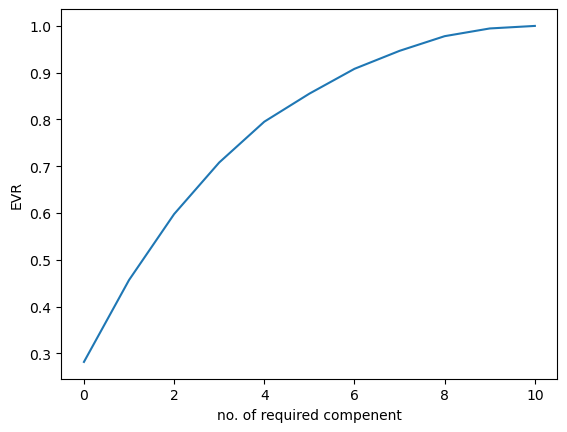

In [63]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no. of required compenent')
plt.ylabel('EVR')
plt.show()

by observing the screen plot we can see we can use only 8 PCA to represent tha dataset.

In [60]:
pca.explained_variance_ratio_

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837,
       0.05996439, 0.05307193, 0.03845061, 0.0313311 , 0.01648483,
       0.00541439])

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 232 from PyObject


In [7]:
df_feature.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [9]:
df_feature.isnull().sum().sum()

0

In [11]:
from sklearn.preprocessing import StandardScaler
scaled_df = StandardScaler()
SND_df = pd.DataFrame(scaled_df.fit_transform(df_feature),columns=df_feature.columns)
SND_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


Dataset has converted into S.N.D data where mean = 0 and std=1

In [12]:
SND_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.435512e-16,1.699704e-16,4.335355e-16,-1.905223e-16,4.838739e-16,1.432042e-16,1.289532e-16,-3.482795e-14,3.002879e-15,7.639596e-16,9.437243e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00


In [20]:
from sklearn.decomposition import PCA
pca=PCA()
pca_arry = pca.fit_transform(SND_df)
pca_arry

array([[-1.61952988,  0.45095009, -1.77445415, ...,  0.00509804,
        -0.26775943,  0.04863012],
       [-0.79916993,  1.85655306, -0.91169017, ..., -0.52070667,
         0.06283285, -0.13814189],
       [-0.74847909,  0.88203886, -1.17139423, ..., -0.08685693,
        -0.18744237, -0.11822866],
       ...,
       [-1.45612897,  0.31174559,  1.12423941, ..., -0.80877339,
         0.24224843, -0.40291033],
       [-2.27051793,  0.97979111,  0.62796456, ..., -0.61224806,
         0.77940384,  0.04092255],
       [-0.42697475, -0.53669021,  1.6289552 , ...,  0.40430898,
         0.77943963, -0.44978056]])

In [16]:
pca_df = pd.DataFrame(pca.fit_transform(SND_df), columns=SND_df.columns)
pca_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098,-0.267759,0.048630
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829,0.762587,-0.520707,0.062833,-0.138142
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553,0.597946,-0.086857,-0.187442,-0.118229
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290,-0.455375,0.091577,-0.130393,0.316714
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098,-0.267759,0.048630


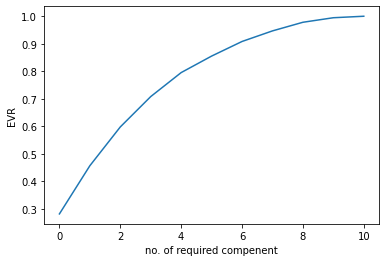

In [23]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no. of required compenent')
plt.ylabel('EVR')
plt.show()

In [18]:
pca.explained_variance_ratio_

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837,
       0.05996439, 0.05307193, 0.03845061, 0.0313311 , 0.01648483,
       0.00541439])

In [25]:
pca1 = PCA(n_components=7)
new_data = pca1.fit_transform(SND_df)
new_data

array([[-1.61952988,  0.45095009, -1.77445415, ...,  0.06701448,
        -0.91392069, -0.16104319],
       [-0.79916993,  1.85655306, -0.91169017, ..., -0.01839156,
         0.92971392, -1.00982858],
       [-0.74847909,  0.88203886, -1.17139423, ..., -0.04353101,
         0.40147313, -0.53955348],
       ...,
       [-1.45612897,  0.31174559,  1.12423941, ...,  0.19371564,
        -0.50640956, -0.23108221],
       [-2.27051793,  0.97979111,  0.62796456, ...,  0.06773549,
        -0.86040762, -0.32148695],
       [-0.42697475, -0.53669021,  1.6289552 , ...,  0.45048209,
        -0.49615364,  1.18913227]])

In [27]:
final_df = pd.DataFrame(new_data,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])
final_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043


In [30]:
y = df.quality
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [32]:
dt_model = DecisionTreeClassifier()
dt_model.fit(final_df,y)

DecisionTreeClassifier()

In [38]:
pca1.transform([[-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098,-0.267759,0.048630]])

array([[-1.85725691, -0.04157881, -0.82759467,  0.51789208,  0.47976778,
         0.13851139,  0.45036783]])

In [39]:
dt_model.predict(pca1.transform([[-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098,-0.267759,0.048630]]))

array([5], dtype=int64)

# customized function for PCA implementation

In [45]:
def pc_calculation(x,b):
    pca={}
    scalar = StandardScaler()
    x_scaled = scalar.fit_transform(x)
    l,x = np.linalg.eig(x_scaled.T @ x_scaled/x_scaled.shape[0]-1)
    for i in range(b):
        pc = x_scaled @x[:,i]
        pca[i] = pc
    pca_df = pd.DataFrame(pca)
    return pca_df
pc_calculation(df_feature,7)

,0,1,2,3,4,5,6
0,-0.559384,1.489017,0.968569,-1.567630,-0.065890,-0.046101,0.269402
1,0.262810,1.094593,1.861643,-0.381719,0.543884,0.123381,-0.066444
2,-0.267991,0.771175,1.200904,-0.808231,0.377575,0.076604,0.181588
3,-0.060746,-2.480628,0.223337,0.930687,-0.708548,-0.339648,0.126059
4,-0.559384,1.489017,0.968569,-1.567630,-0.065890,-0.046101,0.269402
...,...,...,...,...,...,...,...
1594,-0.255977,2.263057,0.254606,0.642355,0.466992,0.050540,-0.357592
1595,0.459815,2.569964,-0.356912,1.440929,0.466735,0.303312,-0.469768
1596,0.024289,1.594747,-0.416747,0.823927,0.514945,0.401966,-0.240508
1597,0.226424,2.522504,0.229453,0.453924,0.640744,0.026592,-0.771052
